# Obligatorisk innlevering 2 - oppgave 2

I denne oppgaven skal vi forsøke å forutsi oppsigelser ved en arbeidsplass basert på en rekke variabler som f.eks alder, kjønn, utdannelse, lønn, osv.

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from scipy.stats import ttest_rel
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report








In [43]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett2.csv")

### Preprosessering:
For å forenkle håndteringen av kategoriske data har jeg her skrevet noe kode som gjør om strenger til intergers

Følgende kolonner er formatert som *object* og inneholder kategoriske variabler i form av strenger

In [44]:
kolonner_obj = df.select_dtypes(include=['object']).columns
print(kolonner_obj)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


I koden under omformer jeg strengene til integers og gir dere "nøkkelen" til å konvertere det tilbake igjen

In [45]:
for i in kolonner_obj:
    print("-----------")
    print(i)
    print("-----------")
    for num, j in enumerate(list(df[i].unique())):
        print("{} = {}".format(j,num))
        df[i].loc[df[i]==j] = num
    df[i] = pd.to_numeric(df[i])

-----------
BusinessTravel
-----------
Travel_Frequently = 0
Travel_Rarely = 1
Non-Travel = 2
-----------
Department
-----------
Research & Development = 0
Sales = 1
Human Resources = 2
-----------
EducationField
-----------
Medical = 0
Other = 1
Marketing = 2
Life Sciences = 3
Technical Degree = 4
Human Resources = 5
-----------
Gender
-----------
Male = 0
Female = 1
-----------
JobRole
-----------
Laboratory Technician = 0
Sales Representative = 1
Sales Executive = 2
Healthcare Representative = 3
Manager = 4
Manufacturing Director = 5
Research Scientist = 6
Human Resources = 7
Research Director = 8
-----------
MaritalStatus
-----------
Married = 0
Divorced = 1
Single = 2
-----------
Over18
-----------
Y = 0
-----------
OverTime
-----------
Yes = 0
No = 1


C:\Users\Emilk\AppData\Local\Temp\ipykernel_16476\3482823818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].loc[df[i]==j] = num
C:\Users\Emilk\AppData\Local\Temp\ipykernel_16476\3482823818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].loc[df[i]==j] = num
C:\Users\Emilk\AppData\Local\Temp\ipykernel_16476\3482823818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].loc[df[i]==j] = num
C:\Users\Emilk\AppData

I outputen fra koden nedenfor viser datatypen til de forskjellige kolonnene, som nå etter preprosesseringen bare består av integers (int64). 

In [46]:
print(df.dtypes)

id                          int64
Age                         int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalanc

In [47]:
# Her deler jeg datasettet inn i egenskaper (X) og target (y) (fjerner også den første kolonnen siden det bare er en ID 
# og har dermed ingen prediktiv verdi)

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# PS: Ikke endre denne kodecellen!

#### Oppgave 2.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? Begrunn svaret

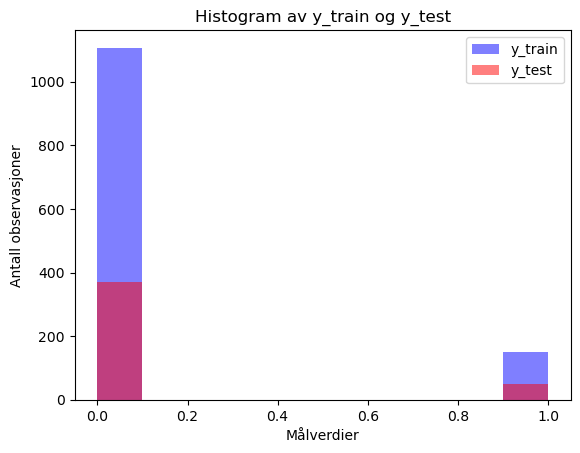

In [48]:
fig, ax = plt.subplots()

ax.hist(y_train, bins=10, alpha=0.5, label='y_train', color='blue')

ax.hist(y_test, bins=10, alpha=0.5, label='y_test', color='red')

ax.set_xlabel('Målverdier')
ax.set_ylabel('Antall observasjoner')
ax.set_title('Histogram av y_train og y_test')

ax.legend(loc='upper right')

plt.show()

**Svar:**
jeg mener det er et klassifisering ettersom verdiene ser ut til å være ja/nei 0/1. Dette er typisk for klassifisering. ettersom det er er 2 stolper ved 0 og 1 uten mellomliggende verdier tyder dette på at målvariabelen er kategorisk, ikke kontinuerlig, noe som ytterligere indikerer et klassifiseringsproblem. (Prøvde å bytte til Bar og syntes det så bedre ut men siden det står histogram i oppgaven velger jeg å la den stå som dette.)


#### Oppgave 2.2)
Velg to modeller og gjør repeterte kryssvalideringer $(10)$ med $K=5$
* Velg hvorvidt du vil bruke "default" hyperparamtre for modellene eller om du vil gjøre et hyperparametersøk
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene skriftlig til slutt 


C:\Users\Emilk\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Emilk\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

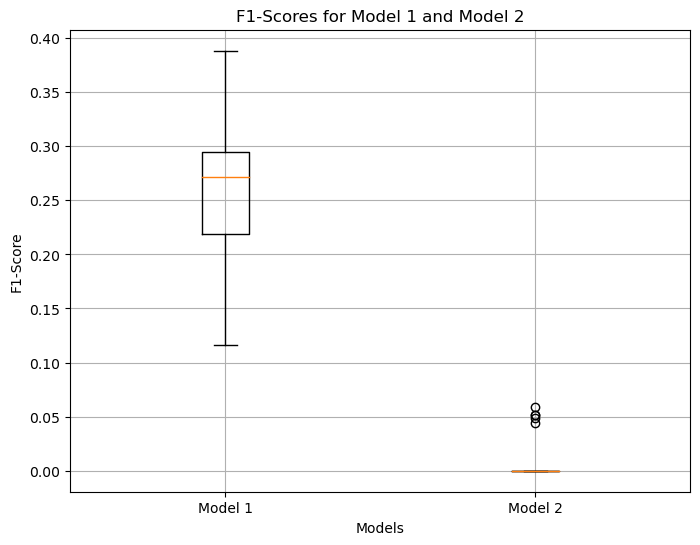

Model 1 F1-Scores: [0.225, 0.15384615384615385, 0.23076923076923078, 0.2857142857142857, 0.18918918918918917, 0.2380952380952381, 0.1818181818181818, 0.16470588235294115, 0.3098591549295775, 0.30769230769230765, 0.24719101123595505, 0.2608695652173913, 0.27184466019417475, 0.21333333333333332, 0.2758620689655172, 0.2465753424657534, 0.23529411764705882, 0.3181818181818182, 0.2894736842105263, 0.2921348314606741, 0.29213483146067415, 0.29545454545454547, 0.20930232558139536, 0.31460674157303375, 0.20454545454545459, 0.2708333333333333, 0.18421052631578946, 0.2826086956521739, 0.29213483146067415, 0.26373626373626374, 0.18181818181818185, 0.38834951456310685, 0.28571428571428575, 0.25, 0.33684210526315794, 0.30434782608695654, 0.20689655172413796, 0.20588235294117646, 0.23076923076923075, 0.32989690721649484, 0.3232323232323232, 0.35294117647058826, 0.11594202898550723, 0.21686746987951808, 0.3132530120481927, 0.29213483146067415, 0.36842105263157887, 0.2857142857142857, 0.27906976744186

In [49]:

X = df.iloc[:, :-1]  
y = df.iloc[:, -1]

model1 = DecisionTreeClassifier()  
model2 = LogisticRegression()       

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

f1_scores_model1 = []
f1_scores_model2 = []

for train_idx, test_idx in cv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model1.fit(X_train, y_train)
    y_pred1 = model1.predict(X_test)
    f1_scores_model1.append(f1_score(y_test, y_pred1))
    
    model2.fit(X_train, y_train)
    y_pred2 = model2.predict(X_test)
    f1_scores_model2.append(f1_score(y_test, y_pred2))


accuracy_model1 = accuracy_score(y, model1.predict(X))
accuracy_model2 = accuracy_score(y, model2.predict(X))


plt.figure(figsize=(8, 6))
plt.boxplot([f1_scores_model1, f1_scores_model2], labels=['Model 1', 'Model 2'])
plt.title('F1-Scores for Model 1 and Model 2')
plt.ylabel('F1-Score')
plt.xlabel('Models')
plt.grid()
plt.show()


t_statistic, p_value = ttest_rel(f1_scores_model1, f1_scores_model2)


if p_value < 0.05:
    result = "Model 1 is statistically significantly better than Model 2."
else:
    result = "There is no statistically significant difference between Model 1 and Model 2."

print("Model 1 F1-Scores:", f1_scores_model1)
print("Model 2 F1-Scores:", f1_scores_model2)
print("Accuracy for Model 1:", accuracy_model1)
print("Accuracy for Model 2:", accuracy_model2)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


**Svar:**

Vi kan basert på tallene si at modell 1 er statistisk den beste modellen, med en høt accuracy på 0.96, Med en  lav P-verdi ( mindre enn 0.05), kan vi si at det er en stor forskjell mellom F1-poengsummene til Model 1 og Model 2. Dette sier oss at Model 1 er klart bedre enn Model 2 når det kommer til F1-poeng.

#### Oppgave 2.3) 
Tren de samme modellene men denne gangen med et balansert datasett
* Bruk imbalaced learn og SMOTE til å oppsample minioritetsklassen (bare oppsample treningsdataene i kryssvalideringen - ikke valideringsdataene)
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene og sammenlign resultatene med 2.2) 

**Svar:**

*< ditt tekstsvar her >*

#### Oppgave 2.4)
Tren den beste modellen på nytt og utfør prediksjon på testsettet. Mål nå ytelsen på testsettet ved bruk av sensitivitet, spesifisitet og presisjon, itillegg til F1-skår og accuracy

ValueError: could not convert string to float: 'Travel_Frequently'

#### Oppgave 2.5)
Del opp testsettet basert på kjønn og gjør en analyse av sensitivitet, spesifisitet og presisjon for menn og det samme for kvinner. Skriv ut og diskuter resultatet og forsøk å svar på følgende spørsmål:
* Er modellen like god for begge kjønn? 
* Hvis ikke, hva tror du er årsaken og hvilke tiltak kan vi gjøre for å forbedre modellen? 

Kjør denne cellen til slutt og legg ved den genererte requirements.txt fila i pull requestet

In [63]:
!pip freeze > requirements.txt